In [ ]:
!git clone https://github.com/NS19972/FairMOT.git

Cloning into 'FairMOT'...
remote: Enumerating objects: 731, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 731 (delta 6), reused 5 (delta 1), pack-reused 719
Receiving objects: 100% (731/731), 63.34 MiB | 18.04 MiB/s, done.
Resolving deltas: 100% (389/389), done.


In [ ]:

!pip install torch==1.7.1 
!pip install torchvision==0.8.2 


In [ ]:
%cd FairMOT
# переходим в директорию FairMOT

!pip install -r requirements.txt
# Установка зависимостей 

!git clone -b pytorch_1.7 https://github.com/ifzhang/DCNv2.git
# Зависимости библиотеки pytorch_1.7 в директорию DCNv2

%cd DCNv2
# переходим в директорию DCNv2

!./make.sh
# Монтируем (собираем) pyTorch1.7 в директории DCNv2


In [ ]:
%cd /content/FairMOT

/content/FairMOT


In [ ]:
!pip install -U --no-cache-dir gdown --pre

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# устанавливаем gdown и обновляем
!pip install -U --no-cache-dir gdown --pre
!pip install --upgrade --no-cache-dir gdown


In [ ]:
# Перед разархивированием необходимо переименовать предыдущую такую же папку src
%mv /content/FairMOT/src /content/FairMOT/src_old 
print ('Переименовали директорию src') # переименовываем оргинальную папку SRC

# переходим в директорию 
%mkdir /content/FairMOT/src 
%cd /content/FairMOT/src 

# загружаем данные из облака
!gdown --no-cookies  --fuzzy https://drive.google.com/file/d/1ZstO37buUoOnrmUpibbOV_-iMFHHiWS7/view?usp=share_link # Dataset_C5
!gdown --no-cookies  --fuzzy https://drive.google.com/file/d/16L4NlCoPsb5XGGiVr_mBOpb70URVILO3/view?usp=share_link # SRC

# распаковываем архивы и копируем в директории 
!unzip "/content/FairMOT/src/src.zip" -d "/content/FairMOT" 
!unzip "/content/FairMOT/src/datasetC5.zip" -d "/content/FairMOT/Dataset_C5"



In [ ]:
import os
import pandas as pd
train_dir = '/content/FairMOT/Dataset_C5/datasetC5/images/train/'
val_dir = '/content/FairMOT/Dataset_C5/datasetC5/images/val/'

training_files = os.listdir(train_dir)
val_files = os.listdir(val_dir)

training_df = pd.DataFrame(training_files,columns=['images'])
training_df.images = training_df.images.map(lambda x: train_dir + x)
val_df = pd.DataFrame(val_files,columns=['images'])
val_df.images = val_df.images.map(lambda x: val_dir + x)


In [ ]:
%cd /content/FairMOT 

/content/FairMOT


In [ ]:
#Generate files containing image paths and save to src/data
train_file = 'src/data/C5.train'
test_file = 'src/data/C5.val'
with open(train_file, 'w') as f:
    f.write("\n".join(training_df.images.values))
with open(test_file, 'w') as f:
    f.write("\n".join(val_df.images.values))

In [ ]:
#Create a json file for the dataset in src/lib/cfg/
import json
train_file = 'src/data/C5.train'
test_file  = 'src/data/C5.val'
cfg = dict(
    root='/content/FairMOT/Dataset_C5/datasetC5/',
    train=dict(C5_train=train_file,
               C5_test=test_file),
    test=dict(C5_test=test_file),
    test_emb=dict(C5_test=test_file),
)
with open('src/lib/cfg/C5.json', 'w') as f:
    json.dump(cfg, f, indent=4)

#### for save weghts в файле /FairMOT/src/train.py
- добавляем пути '/content/drive/MyDrive/igFairMOT/'
- строки: 130 134 139 144 154 
- opt.save_dir, '/content/drive/MyDrive/igFairMOT/model_{}.pth'

In [ ]:
%cd /content/FairMOT/
!python src/train.py --task mot --arch cspdarknet_53  --gpus 0 --batch_size 4 --num_epochs 100 --lr_step '30' --data_cfg '/content/FairMOT/src/lib/cfg/C5.json'

/content/FairMOT
Using tensorboardX
2023-03-21 09:50:40 [DEBUG]: matplotlib data path: /usr/local/lib/python3.9/dist-packages/matplotlib/mpl-data
2023-03-21 09:50:40 [DEBUG]: CONFIGDIR=/root/.config/matplotlib
2023-03-21 09:50:40 [DEBUG]: interactive is False
2023-03-21 09:50:40 [DEBUG]: platform is linux
2023-03-21 09:50:40 [DEBUG]: CACHEDIR=/root/.cache/matplotlib
2023-03-21 09:50:40 [DEBUG]: Using fontManager instance from /root/.cache/matplotlib/fontlist-v330.json
Fix size testing.
training chunk_sizes: [4]
The output will be saved to  /content/FairMOT/src/lib/../../exp/mot/default
opt.gpus:  [0]
Setting up data...
Dataset root: /content/FairMOT/Dataset_C5/datasetC5/
Total 8063 image files in C5_train dataset.
Total 2130 image files in C5_test dataset.
dataset summary
OrderedDict([('C5_train', defaultdict(<class 'int'>, {4: 290.0, 0: 283.0, 1: 270.0, 3: 289.0, 2: 262.0, 5: 269.0})), ('C5_test', defaultdict(<class 'int'>, {3: 296.0, 4: 294.0, 0: 297.0, 5: 233.0, 2: 135.0, 1: 295.0})

#### Выводы (описание запуска) !python src/train.py 
 - arch cspdarknet_53  
 - batch_size 4
 - такая архитектура запуска дает возможность работать к colab на GPU при максимальной загруженности. временная цена эпохи 20-22 минуты.
 
 - Интересно!!! При запуске обучения модели loss начинается с 30. и к 10-й эпохе (при батче 4) падает ниже5, а если ставить на дообучение модель то, ошибка начинается с 21 (т.е. рядом с необученной на нашем датасете). Можно сделать предположение что дообучению лучше предпочесть полное обучение на большем кол-ве эпох. 



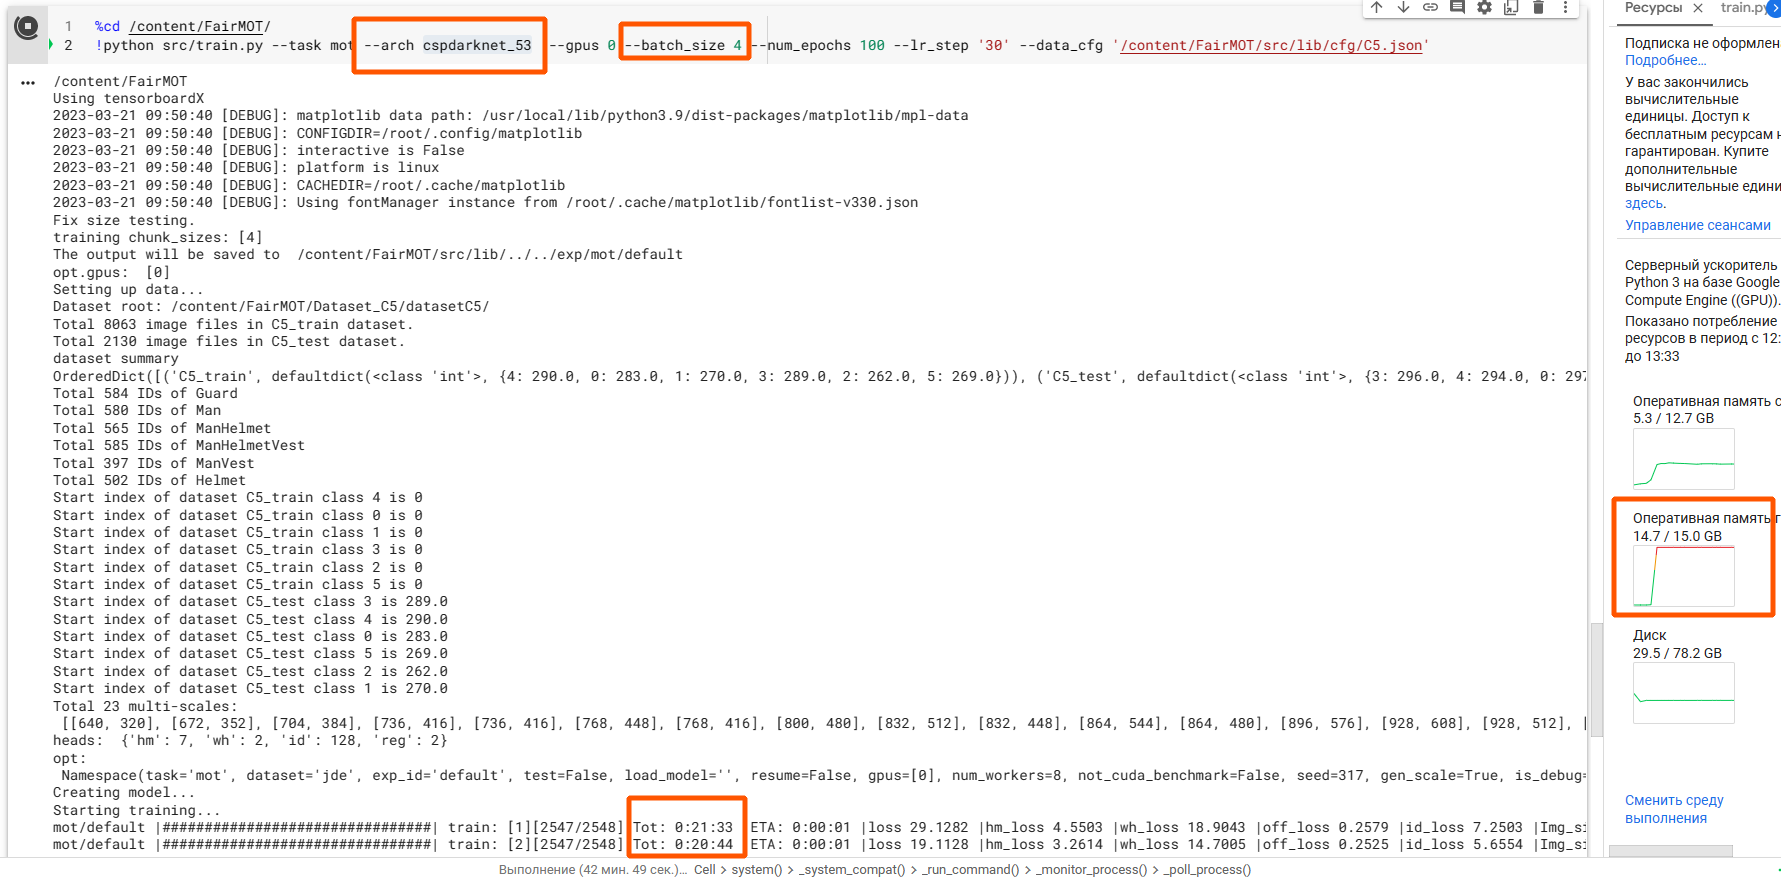

### Есть ошибка: по интерпретации цифр с плавающей точкой (float) из модуля Numpy

Данная ошибка возникает при использовании ускорителя TPU. 

Using tensorboardX

Traceback (most recent call last):
  File "/content/FairMOT/src/train.py", line 25, in <module>
    from lib.datasets.dataset_factory import get_dataset
  File "/content/FairMOT/src/lib/datasets/dataset_factory.py", line 5, in <module>
    from .dataset.jde import JointDataset, MultiScaleJD

  File 
  
  "/content/FairMOT/src/lib/datasets/dataset/jde.py", line 22, in <module>
    from lib.tracker.multitracker import id2cls
  File "/content/FairMOT/src/lib/tracker/multitracker.py", line 12, in <module>
    from lib.tracker import matching
  File "/content/FairMOT/src/lib/tracker/matching.py", line 4, in <module>
    from cython_bbox import bbox_overlaps as bbox_ious
  File "src/cython_bbox.pyx", line 12, in init cython_bbox
  File "/usr/local/lib/python3.9/dist-packages/numpy/__init__.py", line 305, in __getattr__
    raise AttributeError(__former_attrs__[attr])

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



